In [1]:
# 모듈 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# 데이터 불러오기
boston_dataset = load_boston()

# key 출력하기
print(boston_dataset.keys())

# pandas 로 읽어오기
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# MEDV 열 추가하기 (price)
df['MEDV'] = boston_dataset.target

print(df.head())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
# NULL 데이터 확인하기
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
# seaborn 환경 설정하기
sns.set(rc={'figure.figsize':(11.7, 8.27)})

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

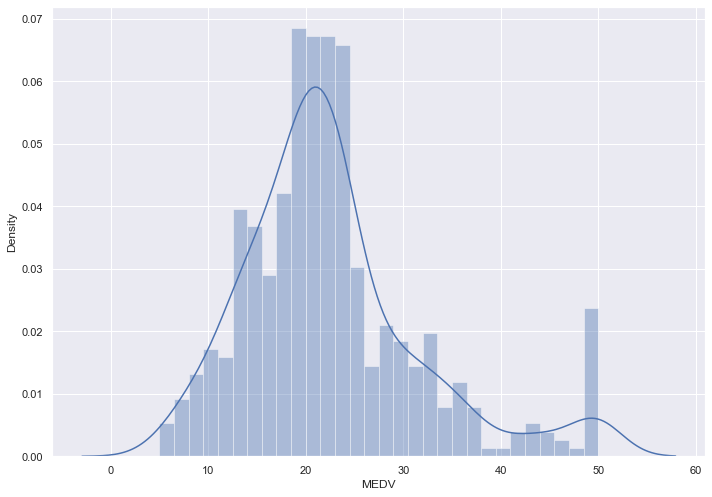

In [5]:
# MEDV 컬럼 산포도+히스토그램
# 정규화되어 있음을 볼 수 있음
sns.distplot(df['MEDV'], bins=30)

<AxesSubplot:>

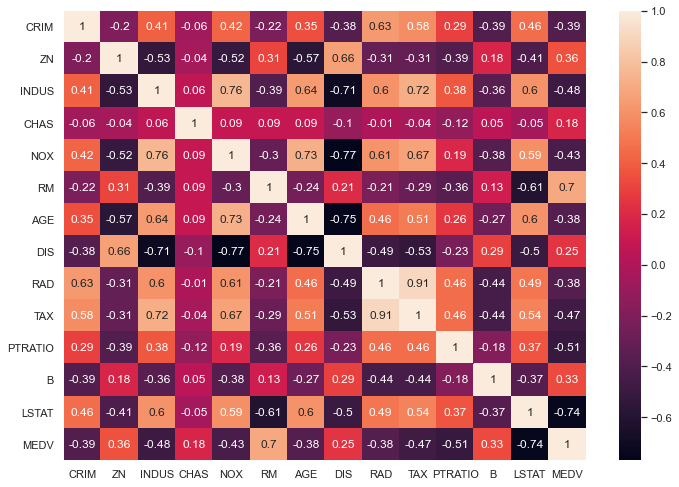

In [6]:
# seaborn heatmap
corr_data = df.corr().round(2)
sns.heatmap(data=corr_data, annot=True)

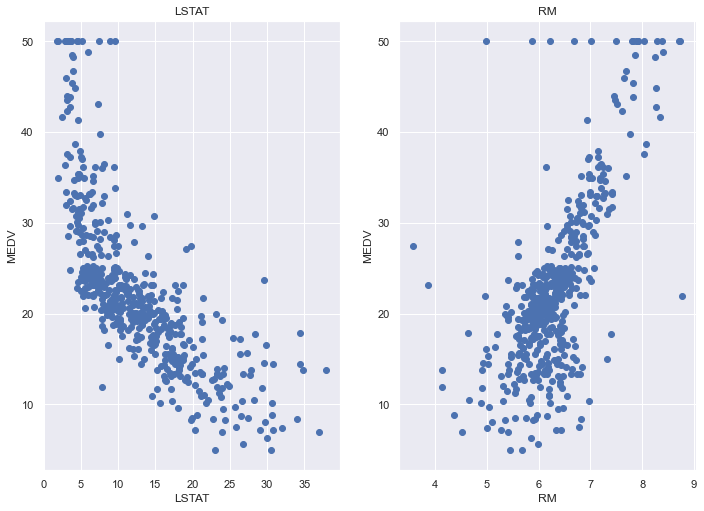

In [7]:
# MDEV 와 RM 데이터 그리고 MDEV, LSTAT 산포도 출력해보기
plt.subplot(1, 2, 1)
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.scatter(df['LSTAT'], df['MEDV'])
plt.subplot(1, 2, 2)
plt.title('RM')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.scatter(df['RM'], df['MEDV'])

In [8]:
# 데이터 준비하기
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns=['LSTAT', 'RM'])
y = df['MEDV']

# 훈련 데이터, 레이블 데이터, 테스트 데이터 분류하기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

print("x_train shape : {}" .format(x_train.shape))
print("x_test shape : {}" .format(x_test.shape))
print("y_train shape : {}" .format(y_train.shape))
print("y_test shape : {}" .format(y_test.shape))

x_train shape : (404, 2)
x_test shape : (102, 2)
y_train shape : (404,)
y_test shape : (102,)


In [11]:
# 모델 훈련하기
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [12]:
# 테스트하기 (x_train, y_train)
predict_train = lin_model.predict(x_train)

# mean squared error
result_mse = mean_squared_error(y_train, predict_train)

# score
result_score = lin_model.score(x_train, y_train)
result_r2 = r2_score(y_train, predict_train)

print("result mse : {} " .format(result_mse))
print("result score : {} " .format(result_score))
print("result r2 score : {} " .format(result_r2))

result mse : 31.777227140320214 
result score : 0.6300745149331701 
result r2 score : 0.6300745149331701 


In [13]:
# 테스트하기 (x_test, y_test)
predict_test = lin_model.predict(x_test)

# mean squared error
result_mse = mean_squared_error(y_test, predict_test)

# score
result_score = lin_model.score(x_test, y_test)
result_r2 = r2_score(y_test, predict_test)

print("result mse : {} " .format(result_mse))
print("result score : {} " .format(result_score))
print("result r2 score : {} " .format(result_r2))

result mse : 26.392886822666085 
result score : 0.6628996975186953 
result r2 score : 0.6628996975186953 
